In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import minmax_scale
from sklearn import metrics


%matplotlib inline

In [2]:
data_file_name = 'data-v11-07-08-29-06-22'
df = pd.read_csv('data/'+ data_file_name +'_cleaned.csv', encoding= 'ISO-8859-8')

In [3]:
df.describe()

,Unnamed: 0.1,DealYear,DealMonth,Rooms,Surface,Floor,Price,PPSQM,BuildYear,Unnamed: 0
count,30986.000000,30986.000000,30986.000000,30985.000000,30986.000000,19651.000000,3.098600e+04,30986.000000,30986.000000,30986.000000
mean,15492.500000,2014.989027,6.505841,3.921188,99.814271,4.389141,1.811796e+06,18599.375460,1992.806461,18636.964532
std,8945.032057,3.155751,3.425763,1.109253,45.130290,4.555763,1.092153e+06,7688.173313,22.626593,10605.760646
min,0.000000,2010.000000,1.000000,1.000000,1.000000,1.000000,1.200000e+04,205.000000,1900.000000,1.000000
25%,7746.250000,2012.000000,4.000000,3.000000,70.000000,2.000000,1.200000e+06,13859.000000,1970.000000,9485.250000
50%,15492.500000,2015.000000,7.000000,4.000000,96.000000,3.000000,1.610000e+06,17209.000000,1999.000000,18810.500000
75%,23238.750000,2018.000000,9.000000,5.000000,120.000000,5.000000,2.160000e+06,21443.000000,2013.000000,27732.750000
max,30985.000000,2020.000000,12.000000,12.000000,800.000000,60.000000,2.200000e+07,67148.000000,2022.000000,36934.000000


# Creating a new DataFrame for Ness-Ziona Rehovot
## The new columns are DealYear and PPSQM

In [4]:
chosen_area = 'ness-ziona-rehovot'
df_chosen = df.loc[df['Area'] == chosen_area]
df_chosen = df_chosen[['DealYear','PPSQM']].astype(int)
print('The new DataFrame for',chosen_area)
df_chosen

The new DataFrame for ness-ziona-rehovot


,DealYear,PPSQM
15747,2010,13425
15748,2010,13109
15749,2010,11985
15750,2010,11090
15751,2010,18000
...,...,...
19147,2020,18301
19148,2020,17440
19149,2020,15810
19150,2020,21410


# Data Visualization

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df_chosen.DealYear, df_chosen.PPSQM)

# Test Train Split Scatter plot

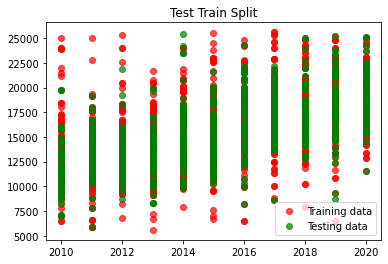

In [6]:
plt.scatter(x_train, y_train, label='Training data', color='r', alpha=.7)
plt.scatter(x_test, y_test, label='Testing data', color='g', alpha=.7)
plt.legend()
plt.title('Test Train Split')
plt.show()

# Price rise prediction using Linear Regression

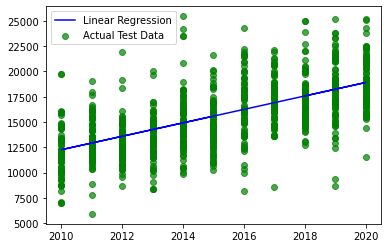

In [7]:
LR = LinearRegression()
LR.fit(x_train.values.reshape(-1,1),y_train.values)
prediction = LR.predict(x_test.values.reshape(-1,1))
plt.plot(x_test, prediction, label='Linear Regression', color='b')
plt.scatter(x_test, y_test, label='Actual Test Data', color='g', alpha=.7)
plt.legend()
plt.show()

# Predicting the price rise

In [8]:
year = int(input("Please enter the year for prediction: "))

r2 = metrics.r2_score(y_test,prediction)    
print('R\u00b2 score for',chosen_area,'is',r2)
    
prediction_price = LR.predict(np.array([[year]]))[0]
print("The predicted price for " + chosen_area + " in the year " + str(year) +" is " + str(int(prediction_price)) + " NIS per square meter")

Please enter the year for prediction: 2030
R² score for ness-ziona-rehovot is 0.3924099085984617
The predicted price for ness-ziona-rehovot in the year 2030 is 25547 NIS per square meter


# Predicting the price rise for all the areas in Gush Dan

Please enter the year for prediction: 2030
Scatter plot for tel-aviv-area


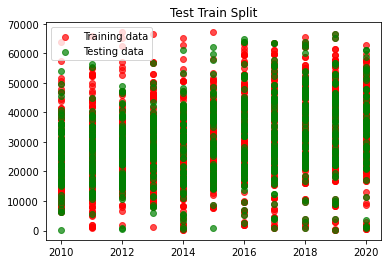

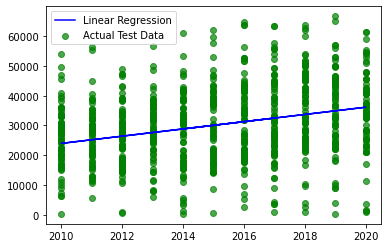

R² score for tel-aviv-area is 0.06674578321834157
The predicted price for tel-aviv-area in the year 2030 is 48270 NIS per square meter
----------------------------------------------------------
Scatter plot for holon-bat-yam


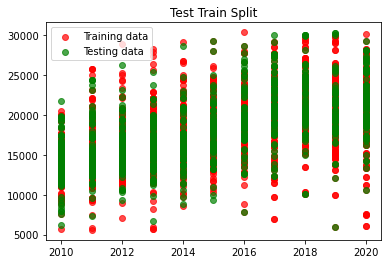

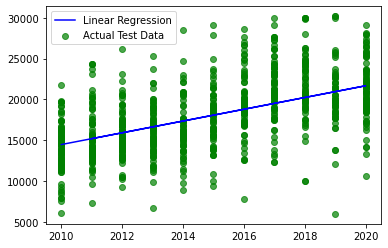

R² score for holon-bat-yam is 0.3191480779550374
The predicted price for holon-bat-yam in the year 2030 is 28876 NIS per square meter
----------------------------------------------------------
Scatter plot for ramat-gan-givatayim


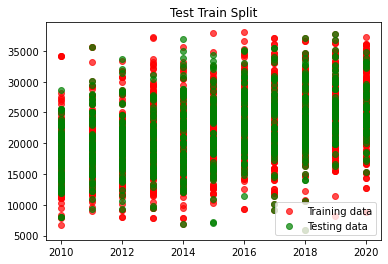

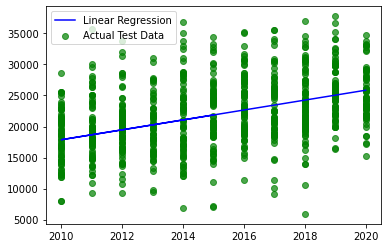

R² score for ramat-gan-givatayim is 0.15388413352136032
The predicted price for ramat-gan-givatayim in the year 2030 is 33829 NIS per square meter
----------------------------------------------------------
Scatter plot for ramat-hasharon-herzliya


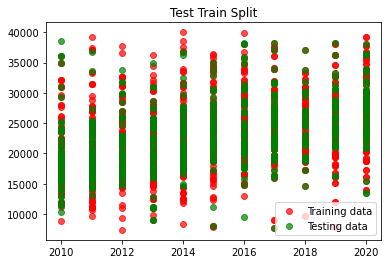

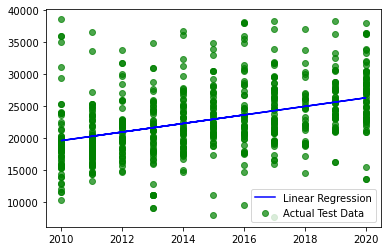

R² score for ramat-hasharon-herzliya is 0.16856327215012423
The predicted price for ramat-hasharon-herzliya in the year 2030 is 32986 NIS per square meter
----------------------------------------------------------
Scatter plot for rishon-lezion-area


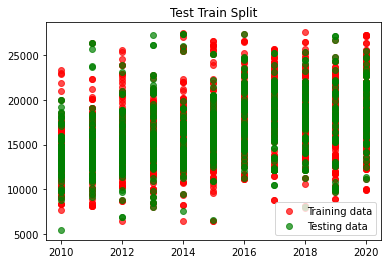

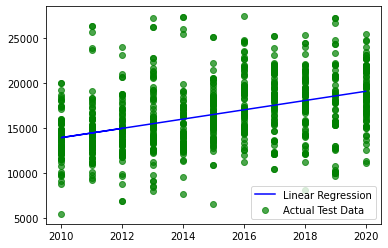

R² score for rishon-lezion-area is 0.16357334558104653
The predicted price for rishon-lezion-area in the year 2030 is 24254 NIS per square meter
----------------------------------------------------------
Scatter plot for ramla-lod


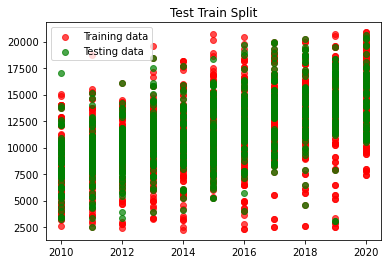

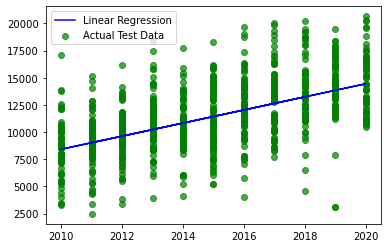

R² score for ramla-lod is 0.3204155183693187
The predicted price for ramla-lod in the year 2030 is 20463 NIS per square meter
----------------------------------------------------------
Scatter plot for petah-tikva-area


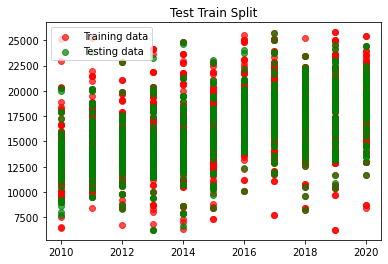

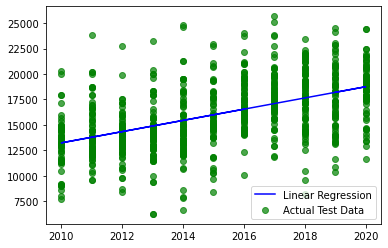

R² score for petah-tikva-area is 0.26978261104288204
The predicted price for petah-tikva-area in the year 2030 is 24267 NIS per square meter
----------------------------------------------------------
Scatter plot for hod-hasharon-area


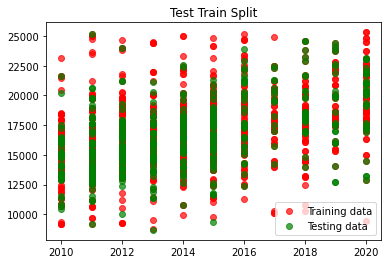

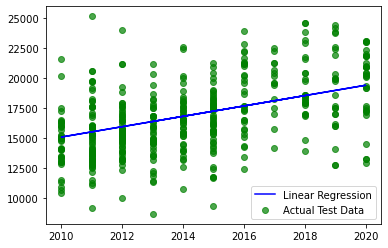

R² score for hod-hasharon-area is 0.2550009812062469
The predicted price for hod-hasharon-area in the year 2030 is 23734 NIS per square meter
----------------------------------------------------------
Scatter plot for raanana-kfar-saba


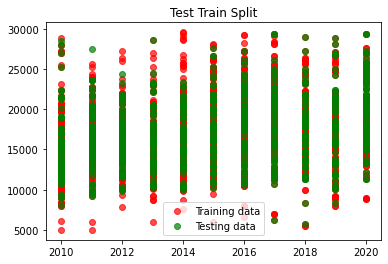

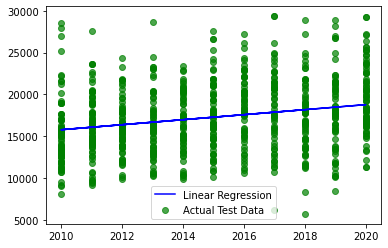

R² score for raanana-kfar-saba is 0.07296412394168184
The predicted price for raanana-kfar-saba in the year 2030 is 21776 NIS per square meter
----------------------------------------------------------


In [9]:
year = int(input("Please enter the year for prediction: "))
areasList = ['tel-aviv-area','holon-bat-yam','ramat-gan-givatayim','ramat-hasharon-herzliya','rishon-lezion-area',
             'ramla-lod','petah-tikva-area','hod-hasharon-area','raanana-kfar-saba']
for area in areasList:
    #creating the df for the chosen area
    df_chosen = df.loc[df['Area'] == area]
    df_chosen = df_chosen.dropna(subset = ['PPSQM'])
    df_chosen = df_chosen[['DealYear','PPSQM']]
    df_chosen['PPSQM'] = df_chosen['PPSQM'].astype(int)
    df_chosen['DealYear'] = df_chosen['DealYear'].astype(int)
    df_chosen = df_chosen[['DealYear','PPSQM']]
    
    #prdicting the ppsqm in chosen year
    x_train, x_test, y_train, y_test = train_test_split(df_chosen.DealYear, df_chosen.PPSQM)
    
    print('Scatter plot for',area)
    plt.scatter(x_train, y_train, label='Training data', color='r', alpha=.7)
    plt.scatter(x_test, y_test, label='Testing data', color='g', alpha=.7)
    plt.legend()
    plt.title('Test Train Split')
    plt.show()
    
    
    LR = LinearRegression()
    LR.fit(x_train.values.reshape(-1,1),y_train.values)
    prediction = LR.predict(x_test.values.reshape(-1,1))
    
    
    plt.plot(x_test, prediction, label='Linear Regression', color='b')
    plt.scatter(x_test, y_test, label='Actual Test Data', color='g', alpha=.7)
    plt.legend()
    plt.show()
    
    
    print('R\u00b2 score for',area,'is',metrics.r2_score(y_test,prediction))
    
    prediction_price = LR.predict(np.array([[year]]))[0]
    print("The predicted price for " + area + " in the year " + str(year) +" is " + str(int(prediction_price)) + " NIS per square meter")
    print('----------------------------------------------------------')
    
    

# Predicting the price rise for Gush Dan

The new DataFrame for Gush Dan


,DealYear,PPSQM
0,2010,7421
1,2010,25562
2,2010,20859
3,2010,26004
4,2010,63974
...,...,...
30981,2020,26847
30982,2020,19000
30983,2020,18497
30984,2020,18497


Scatter plot for Gush Dan


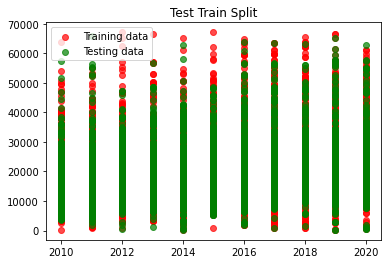

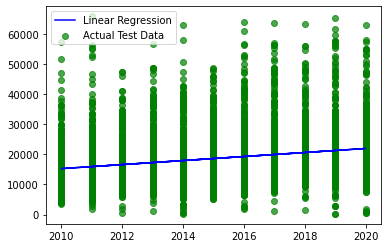

R² score for Gush Dan is 0.07550124632417221
The predicted price for Gush Dan in the year 2030 is 28637 NIS per square meter


In [10]:
df_gushdan = df[['DealYear','PPSQM']]
df_gushdan = df_gushdan.astype(int)
print('The new DataFrame for Gush Dan')
display(df_gushdan)

x_train, x_test, y_train, y_test = train_test_split(df_gushdan.DealYear, df_gushdan.PPSQM)
    
print('Scatter plot for Gush Dan')
plt.scatter(x_train, y_train, label='Training data', color='r', alpha=.7)
plt.scatter(x_test, y_test, label='Testing data', color='g', alpha=.7)
plt.legend()
plt.title('Test Train Split')
plt.show()
      
LR = LinearRegression()
LR.fit(x_train.values.reshape(-1,1),y_train.values)
prediction = LR.predict(x_test.values.reshape(-1,1))
    
    
plt.plot(x_test, prediction, label='Linear Regression', color='b')
plt.scatter(x_test, y_test, label='Actual Test Data', color='g', alpha=.7)
plt.legend()
plt.show()
    
    
print('R\u00b2 score for Gush Dan is',metrics.r2_score(y_test,prediction))
    
prediction_price = LR.predict(np.array([[year]]))[0]
print("The predicted price for Gush Dan in the year " + str(year) +" is " + str(int(prediction_price)) + " NIS per square meter")